# Graph Partitioning via Qatalyst

### Objective

##### Partition a graph into <span style="color: red;">$k$</span> disjoint collections of nodes, **WHILE** minimizing the number of inter-partition edges.

For example, the figure below is an illustration of the Zachary Karate Club social interactions and the partition found using DWave's quantum annealing device.

<img src="figures/zachary_kc_graph.png" width="600" height="450">

### Via Qatalyst

#### I. Import

In [37]:
from qci_client import QciClient
import helpers
import numpy as np
import networkx as nx
import sys, os

import matplotlib.pyplot as plt
%matplotlib inline

#### II. Specify Problem instance (with networkx, DiMAC, or other formats)

Barbell graph instance 
- 8 nodes per cluster
- 2 nodes connected by edges between the clusters

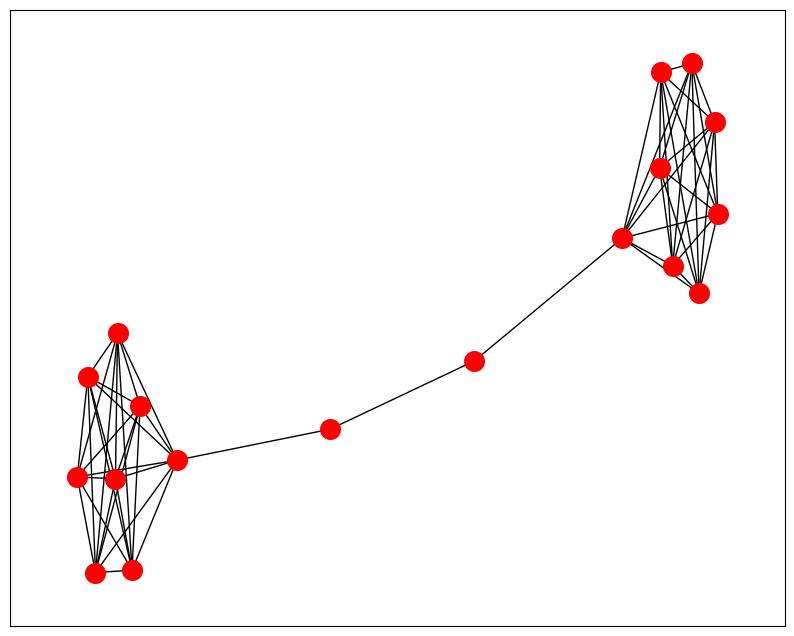

In [38]:
barbell_graph = nx.barbell_graph(8, 2)
helpers.plot_graph_plain(barbell_graph)

#### III. Define client request parameters
- *alpha* and *beta* hyperparameters (weighted importance of objective versus constraint)
- number of samples (size of distribution to collect)
- number of partitions (<span style="color: red;">**$k$**</span>)
- sampler_type: <span style="color: blue;">**eqc1**</span> or <span style="color: blue;">**csample**</span>
- job_type: <span style="color: green;">**graph-partitioning**</span>

In [39]:
# Constraint-objective hyperparameters
alpha = 1
beta = 1
# Num samples
n_samples = 1
# Number of partitions
num_partitions = 2
# Job and sampler type
sampler_type = "eqc1"
job_type = "graph-partitioning"

#### IV. Instantiate client, pass job parameters and execute
- REQUIREMENT: *QciClient* client token
- Preliminary, *upload_file* to upload problem and retrieve <span style="color: red;">**file_id**</span>
- Pass <span style="color: red;">**file_id**</span>, alongside with the above parameters, to request body call, <span style="color: green;">**build_job_body**</span>
- Execute job with <span style="color: blue;">**process_job**</span>

In [40]:
url = "https://api.qci-next.com"
q1 = QciClient(api_token=os.getenv("QCI_TOKEN"), url=url)

In [41]:
file_id = q1.upload_file(barbell_graph, file_type="graph")["file_id"]
job_body = q1.build_job_body(job_type=job_type, graph_file_id=file_id, 
                             job_tags=["top", "knot", "!"], 
                             job_params={"sampler_type": sampler_type,
                                         "n_samples": n_samples, 
                                         "alpha": alpha,
                                         "beta": beta,
                                         "num_partitions": num_partitions})

res = q1.process_job(job_type=job_type, job_body=job_body, wait=True)

Job submitted job_id='6386574b3cc5838d9919fcbd'-: 2022/11/29 14:02:35
RUNNING: 2022/11/29 14:02:36
COMPLETED: 2022/11/29 14:03:01


#### V. Evaluate returned solution

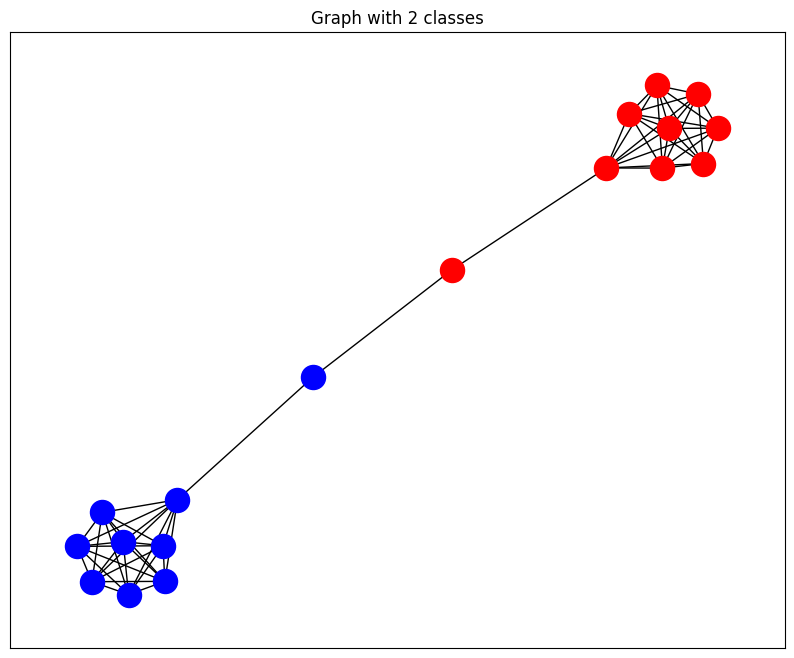

In [42]:
helpers.plot_graph_classes(barbell_graph, res['results']['samples'][0], num_classes=2)

### RINSE AND REPEAT (With different graph instances)

#### Random graph instance
- Create a random graph with low density

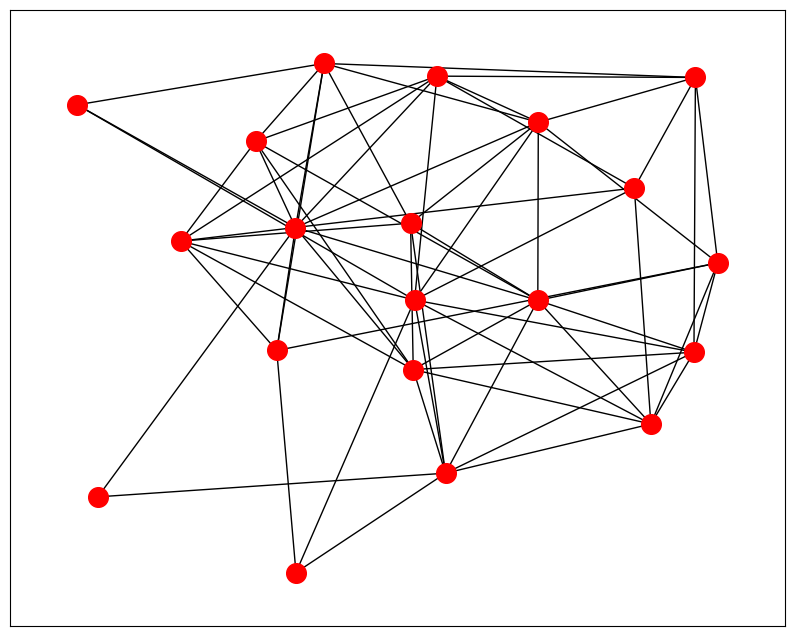

In [43]:
random_graph = nx.erdos_renyi_graph(20, 0.3)
helpers.plot_graph_plain(random_graph)

#### Job parameters
- Same as parameters in barbell graph instance

#### Execute

In [44]:
# Upload, build, process
file_id = q1.upload_file(random_graph, file_type="graph")["file_id"]
job_body = q1.build_job_body(job_type=job_type, graph_file_id=file_id, 
                             job_tags=["top", "knot", "!"], 
                             job_params={"sampler_type": sampler_type,
                                         "n_samples": n_samples, 
                                         "alpha": alpha,
                                         "beta": beta,
                                         "num_partitions": num_partitions})

res = q1.process_job(job_type=job_type, job_body=job_body, wait=True)

Job submitted job_id='638657c73cc5838d9919fcc9'-: 2022/11/29 14:04:39
RUNNING: 2022/11/29 14:04:40
COMPLETED: 2022/11/29 14:05:03


#### Evaluate

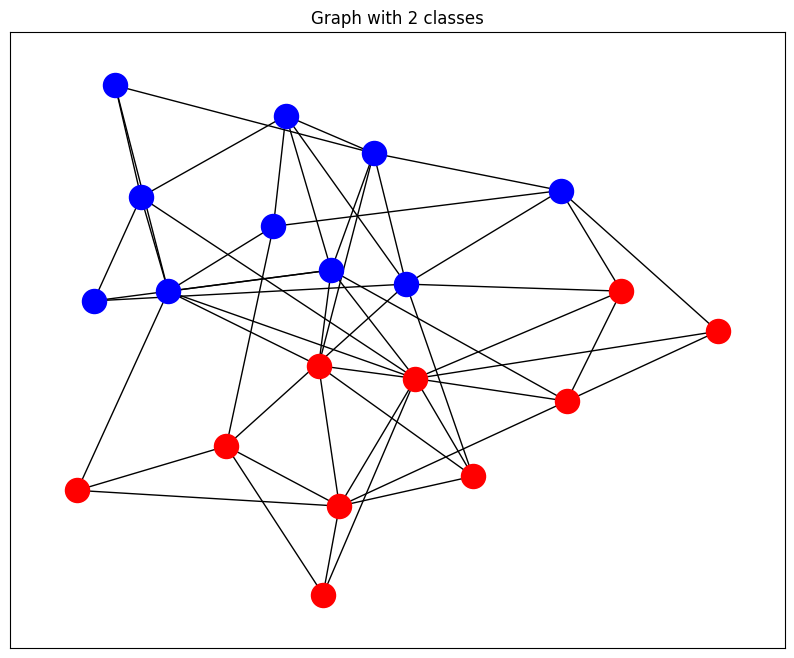

In [30]:
graph_viz.plot_graph_classes(random_graph, res['results']['samples'][0], num_classes=2)